# Predicting House Prices

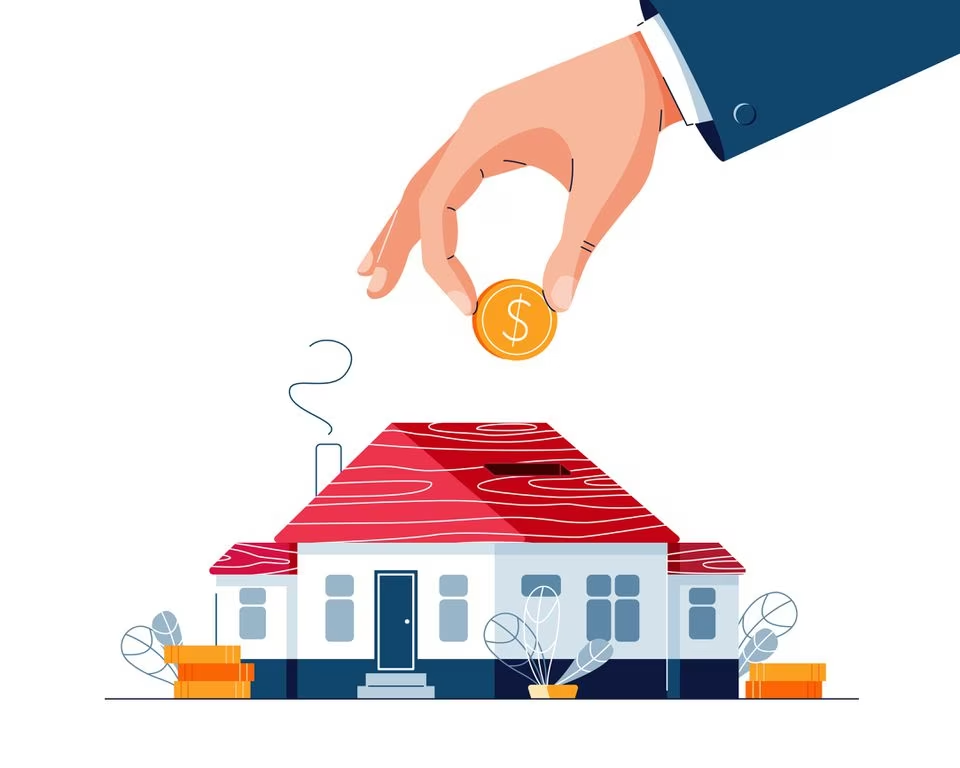

### Objectives

- To identify the most important features in the dataset
- To employ techniques of data preprocessing 
- To build a linear regression model that will predict the housing prices of a town or a suburb based on the features of the locality provided.

### Dataset Information
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

##### Prepare Data

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# read the data
df = pd.read_csv('boston.csv')

# view the first few rows
df.head()  

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
# Inspect the data based on shape and info
print(df.shape)
print(df.info())

(506, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [4]:
# summary statistics of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##### Explore data

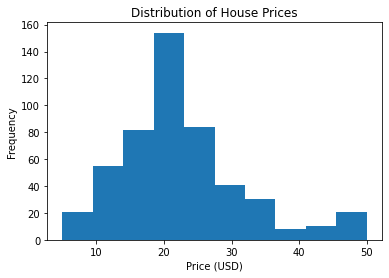

In [5]:
# plot histogram of MEDV
plt.hist(df['MEDV'])
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices');

From the histogram, the highest prices paid for houses are between 20000dollars to 25000dollars as median value.

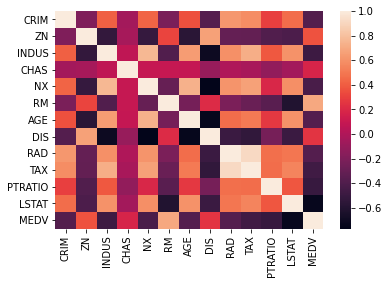

In [6]:
# determine the most suitable features via correlation
sns.heatmap(df.corr());

In [7]:
corr = df['MEDV'].corr(df['RM'])
print('The correlation between median house value and avg. rooms per dwelling is %.2f' %corr)

The correlation between median house value and avg. rooms per dwelling is 0.70


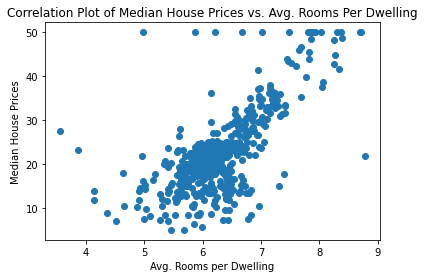

In [8]:
#plot the correlation
plt.scatter(x = 'RM', y = 'MEDV', data = df)
plt.xlabel('Avg. Rooms per Dwelling')
plt.ylabel('Median House Prices')
plt.title('Correlation Plot of Median House Prices vs. Avg. Rooms Per Dwelling');

##### Model development I

In [9]:
# define the feature (X) and label (y)
X = df.drop(columns=['CHAS','MEDV'])
y = df['MEDV']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# baseline
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print('Baseline MAE:', round(mae_baseline, 2))

Baseline MAE: 6.84


In [11]:
# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# verify the shape of the training sets
X_train.shape, y_train.shape

((354, 11), (354,))

##### Model evaluation I

In [13]:
# evaluate the model performance on the training data
y_pred_train = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_train)
print('Training MAE:', round(mae_training, 2))

Training MAE: 3.48


The model beat the baseline by 3.39. So, a fair to good model.

In [14]:
# predicting prices using the model
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    28.871493
1    33.803688
2    14.650100
3    25.492469
4    18.293218
dtype: float64

In [15]:
# evaluate the model performance on the test data
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print('Test MAE:', round(mae_test, 2))

Test MAE: 3.22


##### Communicate results I

In [16]:
# extract the intercept and coefficients for our model
intercept = model.intercept_
coefficients  = model.coef_

# the length of the coefficients
print('coefficients len:', len(coefficients))

# the first five coefficients
print(coefficients[:5])   

coefficients len: 11
[ -0.15046892   0.03911461   0.06115114 -15.45557418   3.98570499]


In [17]:
# extract the feature names
feature_names = X_train.columns
print(feature_names)

Index(['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')


In [18]:
feat_imp = pd.Series(coefficients, index = feature_names)
print(feat_imp.head())

CRIM     -0.150469
ZN        0.039115
INDUS     0.061151
NX      -15.455574
RM        3.985705
dtype: float64


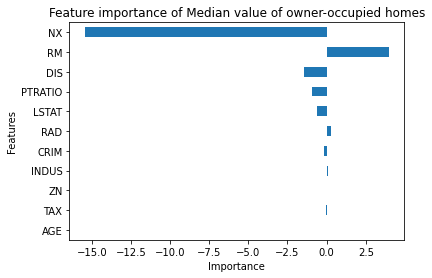

In [19]:
# plot the coefficients of the model
feat_imp.sort_values(key=abs).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importance of Median value of owner-occupied homes");

Looking at the barchart, RM (average number of rooms per dwelling) increases the predicted MEDV (median value of owner-occupied homes), while NX (nitric oxides concentration, parts per 10 million) decreases the predicted MEDV.

##### Model development II

In [20]:
# define the feature (X) and label (y)
X2 = df[['RM']]
y2 = df['MEDV']

# split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

# define the model
model2 = LinearRegression()

# fit the model
model2.fit(X2_train, y2_train)

LinearRegression()

##### Model evaluation II

In [21]:
# evaluate the model performance on the training data
y_pred2_train = model2.predict(X2_train)
mae2_training = mean_absolute_error(y2_train, y_pred2_train)
print('Training MAE2:', round(mae2_training, 2))

Training MAE2: 4.5


##### Communicate results II

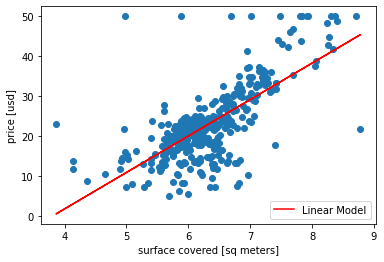

In [22]:
# a plot to show the relationship between the observations in `X2_train` and the model's predictions
plt.plot(X2_train, y_pred2_train, color="red", label="Linear Model")
plt.scatter(X2_train, y2_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

##### Model development III

In [23]:
# define the feature (X) and label (y)
X3 = df[['NX']]
y3 = df['MEDV']

# split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 42)

# define the model
model3 = LinearRegression()

# fit the model
model3.fit(X3_train, y3_train)

LinearRegression()

##### Model evaluation III

In [24]:
# evaluate the model performance on the training data
y_pred3_train = model3.predict(X3_train)
mae3_training = mean_absolute_error(y3_train, y_pred3_train)
print('Training MAE3:', round(mae3_training, 2))

Training MAE3: 6.18


##### Communicate results III

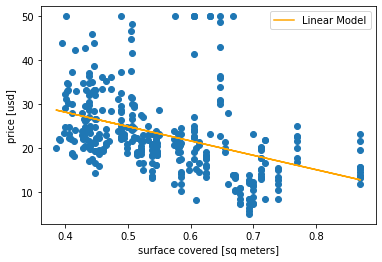

In [25]:
# a plot to show the relationship between the observations in `X3_train` and the model's predictions
plt.plot(X3_train, y_pred3_train, color="orange", label="Linear Model")
plt.scatter(X3_train, y3_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

In conclusion, the first model did better than the latter in beating the baseline, and hence can be considered a good model for the prediction of MEDV. 